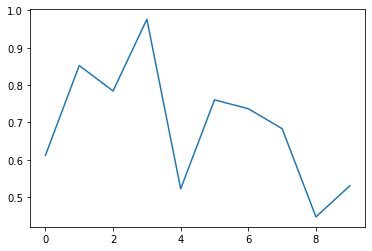

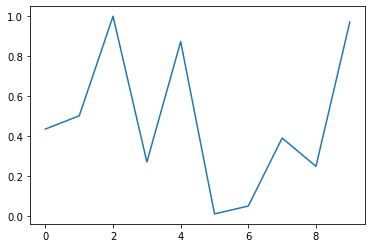

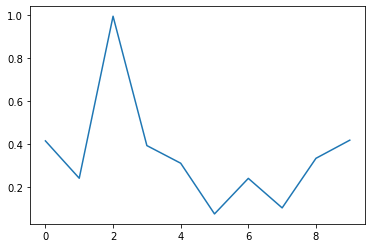

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.version_info


%matplotlib inline
plt.ioff()

for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()


In [1]:
import stockapi as s

In [20]:
aapl90  = s.get_ticker_df('AAPL')[1]

aapl200 = s.get_ticker_df('AAPL',200)[1]

In [29]:
aaplma90 = aapl90['close'].rolling(window=90,min_periods=1).mean()
aaplma90_1 = aapl200['close'].rolling(window=89).mean()

In [56]:
print(aapl90['close'].rolling(window=100,min_periods=87).mean().to_list()[-1])
print(aapl200['close'].rolling(window=90,min_periods=1).mean().to_list()[-1])


305.3686197215113
304.61322157118053


In [61]:
import utils

sp = utils.read_pickle('analysis-sp500.p')


under = utils.read_pickle('under-ma-analysis-sp500.p')

sp[sp.ticker == 'DD']



,ticker,rank,close,atr,cls_gt_ma,gap
127,DD,0.188554,53.610001,1.936225,True,False
